# Part 1: Predicting the mass of stars

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import pydotplus
from IPython.display import Image


## Exoplanets.csv

In [8]:
planets = pd.read_csv('exoplanets.csv')
planets

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0000,3.00000,3.00000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,ZTFJ0220+21 b,Confirmed,14.0000,6.00000,6.00000,NaN,NaN,NaN,0.54,0.07,...,WD,NaN,NaN,NaN,14200.0,1000.0,1000.0,NaN,NaN,NaN
5650,ZTFJ0407-00 b,Confirmed,19.0000,3.00000,3.00000,NaN,NaN,NaN,0.44,0.02,...,WD,NaN,NaN,NaN,17400.0,1200.0,1200.0,NaN,NaN,NaN
5651,ZTF-J1622+47 b,Confirmed,61.0000,19.00000,19.00000,NaN,NaN,NaN,0.98,0.02,...,NaN,NaN,NaN,NaN,29000.0,NaN,NaN,NaN,NaN,NaN
5652,ZTFJ1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.68,0.07,...,WD,NaN,NaN,NaN,11200.0,300.0,300.0,NaN,NaN,NaN


In [9]:
planets.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [10]:
df = planets[['name', 'radius', 'semi_major_axis', 'eccentricity', 'angular_distance', 'orbital_period', 'mass']]
df = df.dropna(how='any', axis = 0)
exo_data = df.set_index('name')
exo_data.head()

,radius,semi_major_axis,eccentricity,angular_distance,orbital_period,mass
name,,,,,,
2M 2140+16 b,0.9200,3.530000,0.2600,0.141200,7340.000000,20.00000
2M 2206-20 b,1.3000,4.480000,0.0000,0.167979,8686.000000,30.00000
51 Peg b,1.9000,0.052000,0.0069,0.003537,4.230800,0.47000
55 Cnc e,0.1737,0.015439,0.0280,0.001264,0.736548,0.02703
BD-10 3166 b,1.0300,0.046000,0.0104,0.000697,3.487800,0.46000


### Prediction test:
- mass prediction based on orbital period, semi-major and minor axes, eccentricity

### Training

In [11]:
features = exo_data.copy().drop(columns = 'mass')
target = exo_data['mass']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size = 0.3)

In [13]:
model = DecisionTreeRegressor(random_state=42)

In [14]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)

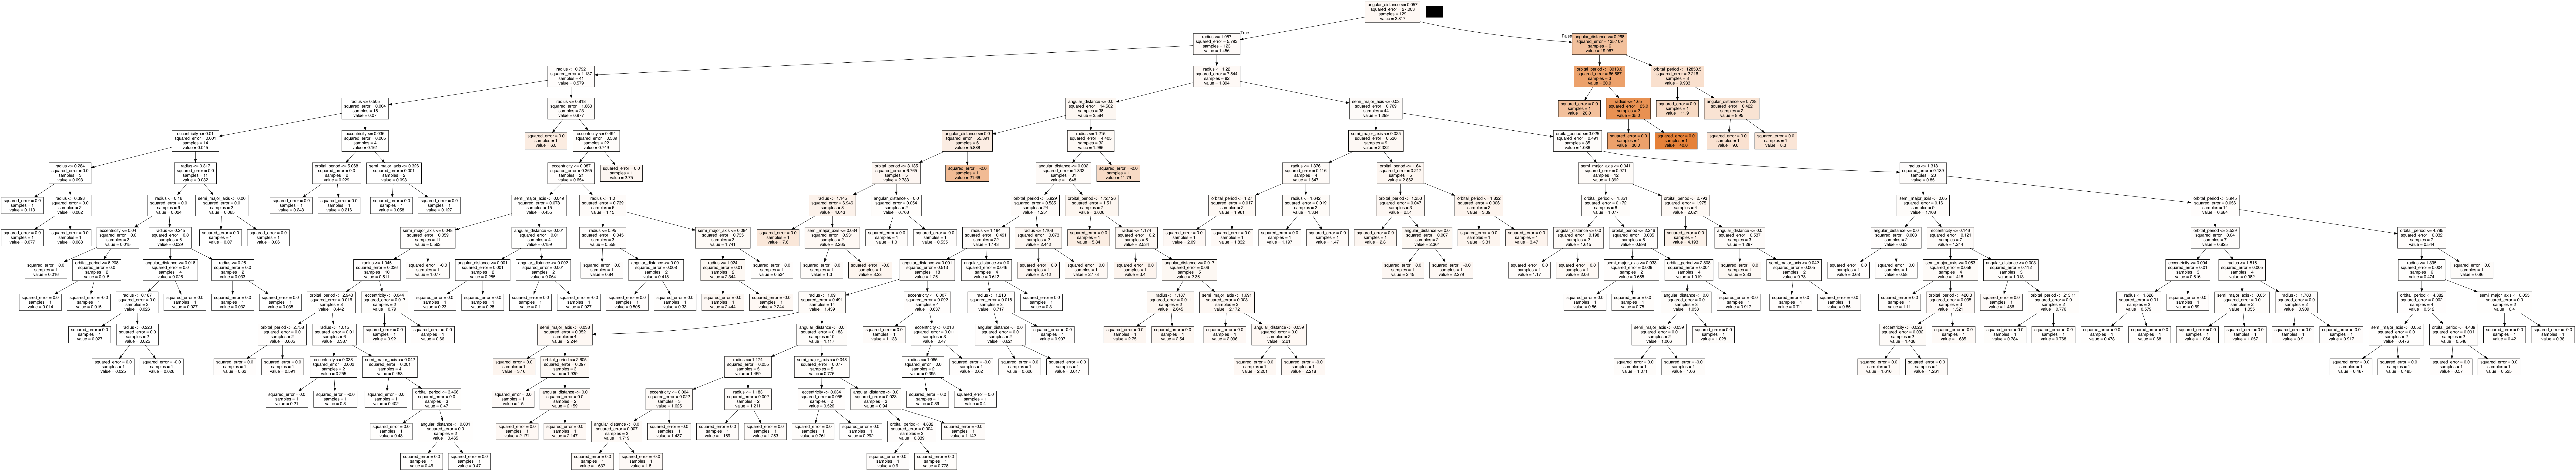

In [16]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=features.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



- not overfitted

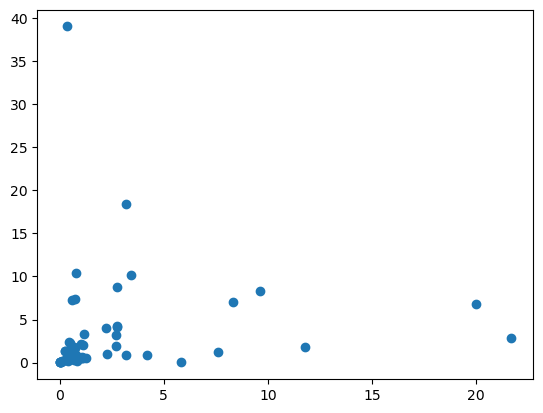

In [18]:
plt.scatter(y_pred, y_test)

#### Evaluation

In [13]:
mean_absolute_error(y_test, y_pred)

3.1643630357142856

In [14]:
mean_squared_error(y_test, y_pred)

49.003488882083936

In [15]:
r2_score(y_test, y_pred)

-0.38756475425979087

In [16]:
explained_variance_score(y_test, y_pred)

-0.37286439237700075

#### Testing

In [23]:
#random sample
new_data = exo_data[['radius', 'semi_major_axis', 'eccentricity', 'angular_distance', 'orbital_period']].iloc[132:137]
# model.predict(new_data)
new_data


,radius,semi_major_axis,eccentricity,angular_distance,orbital_period
name,,,,,
Kepler-4 b,0.357,0.04560,0.0,0.000083,3.213460
Kepler-8 b,1.416,0.04740,0.0,0.000036,3.522499
OGLE-TR-10 b,1.720,0.04162,0.0,0.000028,3.101290
OGLE-TR-111 b,1.077,0.04700,0.0,0.000031,4.014510
OGLE-TR-113 b,1.110,0.02290,0.0,0.000015,1.432477


In [24]:
#predicted vals
model.predict(new_data)

array([0.077, 0.478, 0.68 , 1.   , 7.6  ])

In [27]:
#actual vals
exo_data['mass'].iloc[132:137]

name
Kepler-4 b       0.077
Kepler-8 b       0.590
OGLE-TR-10 b     0.680
OGLE-TR-111 b    0.540
OGLE-TR-113 b    1.240
Name: mass, dtype: float64

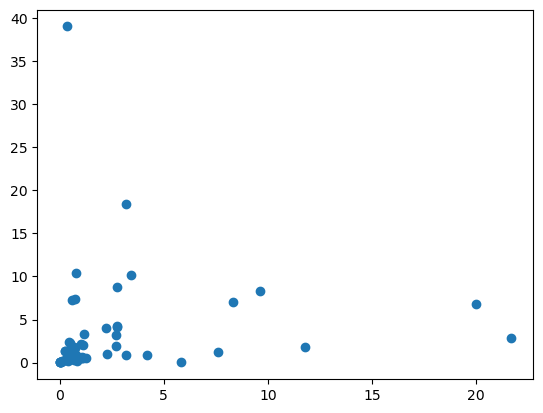

In [20]:
plt.scatter(y_pred, y_test)